In [1]:
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
def label_assignment(img,label):
    return label

def training_data(label, data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [4]:
beans = '../input/repository/abhinavsagar-grocery-c457bd9/BEANS'
cake = '../input/repository/abhinavsagar-grocery-c457bd9/CAKE'
candy = '../input/repository/abhinavsagar-grocery-c457bd9/CANDY'
cereal = '../input/repository/abhinavsagar-grocery-c457bd9/CEREAL'
chips = '../input/repository/abhinavsagar-grocery-c457bd9/CHIPS'
chocolate = '../input/repository/abhinavsagar-grocery-c457bd9/CHOCOLATE'
coffee = '../input/repository/abhinavsagar-grocery-c457bd9/COFFEE'
corn = '../input/repository/abhinavsagar-grocery-c457bd9/CORN'
fish = '../input/repository/abhinavsagar-grocery-c457bd9/FISH'
flour = '../input/repository/abhinavsagar-grocery-c457bd9/FLOUR'
honey = '../input/repository/abhinavsagar-grocery-c457bd9/HONEY'
jam = '../input/repository/abhinavsagar-grocery-c457bd9/JAM'
juice = '../input/repository/abhinavsagar-grocery-c457bd9/JUICE'
milk = '../input/repository/abhinavsagar-grocery-c457bd9/MILK'
nuts = '../input/repository/abhinavsagar-grocery-c457bd9/NUTS'
oil = '../input/repository/abhinavsagar-grocery-c457bd9/OIL'
pasta = '../input/repository/abhinavsagar-grocery-c457bd9/PASTA'
rice = '../input/repository/abhinavsagar-grocery-c457bd9/RICE'
soda = '../input/repository/abhinavsagar-grocery-c457bd9/SODA'
spices = '../input/repository/abhinavsagar-grocery-c457bd9/SPICES'
sugar = '../input/repository/abhinavsagar-grocery-c457bd9/SUGAR'
tea = '../input/repository/abhinavsagar-grocery-c457bd9/TEA'
tomato_sauce = '../input/repository/abhinavsagar-grocery-c457bd9/TOMATO_SAUCE'
vinegar = '../input/repository/abhinavsagar-grocery-c457bd9/VINEGAR'
water = '../input/repository/abhinavsagar-grocery-c457bd9/WATER'

X = []
Z = []
imgsize = 150

In [5]:
training_data('beans',beans)
training_data('cake',cake)
training_data('candy',candy)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('fish',fish)
training_data('flour',flour)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('milk',milk)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('psata',pasta)
training_data('rice',rice)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)


100%|██████████| 262/262 [00:01<00:00, 213.23it/s]


In [6]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,25)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

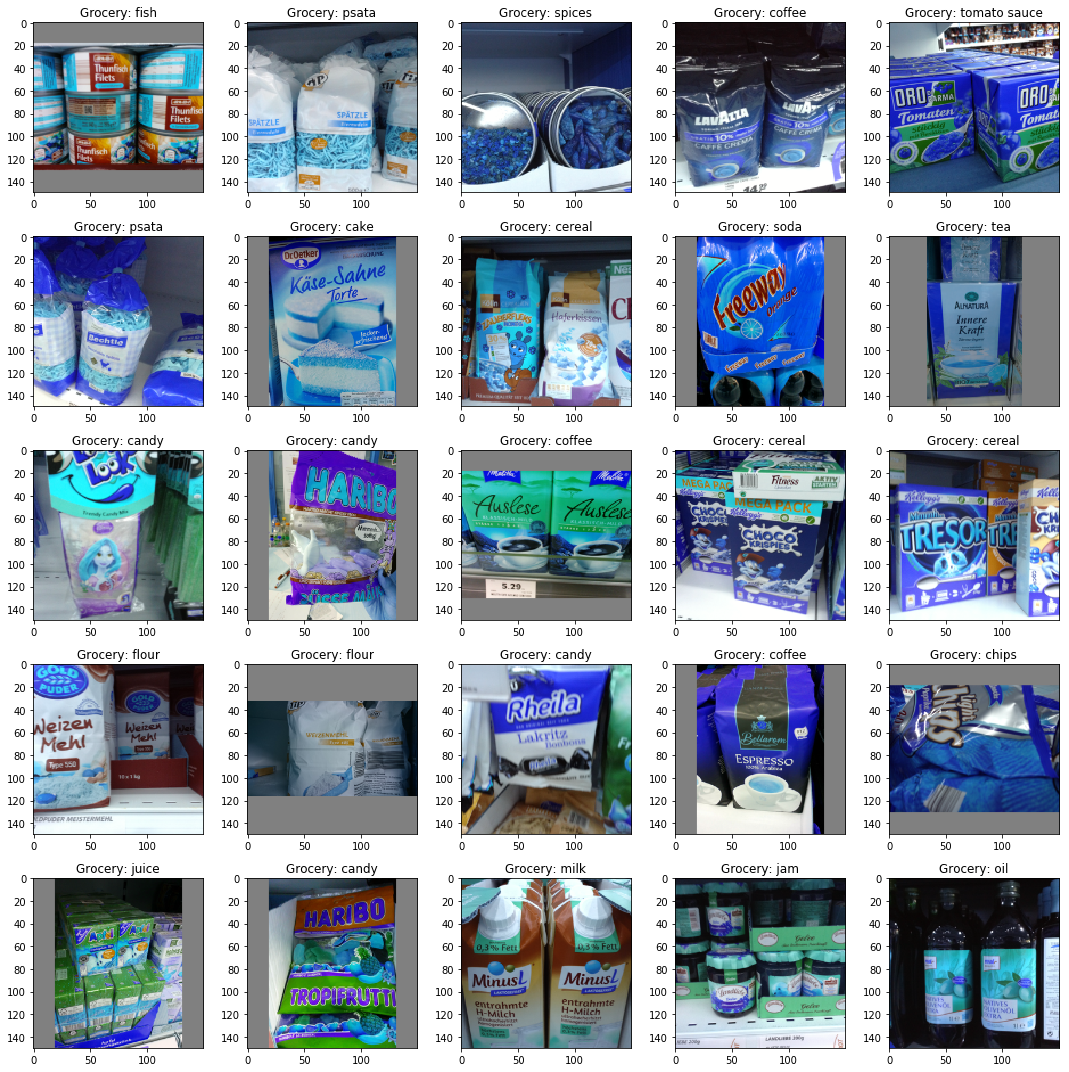

In [8]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Grocery: '+Z[l])
        
plt.tight_layout()

In [9]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(25,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<keras.engine.input_layer.InputLayer object at 0x7f9131756898> False
<keras.layers.convolutional.Conv2D object at 0x7f9183e96da0> False
<keras.layers.convolutional.Conv2D object at 0x7f91316e4588> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9131676390> False
<keras.layers.convolutional.Conv2D object at 0x7f91316ed208> False
<keras.layers.convolutional.Conv2D object at 0x7f913170cbe0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9130616a58> False
<keras.layers.convolutional.Conv2D object at 0x7f91306164e0> False
<keras.layers.convolutional.Conv2D object at 0x7f91305ca160> False
<keras.layers.convolutional.Conv2D object at 0x7f9130562c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f91305786a0> False
<keras.layers.convolutional.Conv2D object at 0x7f9130578748> False
<keras.layers.convolutional.Conv2D object at 0x7f9130530908> False
<keras.layers.convolutional.Conv2D object at 0x7f913054b908> False
<keras.layers.pooling.MaxPooling2D object at 0x7f91304e0b38>

In [10]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [11]:

opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-3)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt1,
    metrics=['accuracy']
)

history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    validation_steps = 100,
    steps_per_epoch  = 100,
    epochs = 50, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/50
100/100 [==============================] - 75s 748ms/step - loss: 3.0770 - acc: 0.1155 - val_loss: 2.7290 - val_acc: 0.2586

Epoch 00001: val_acc improved from -inf to 0.25859, saving model to ./base.model
Epoch 2/50
100/100 [==============================] - 69s 693ms/step - loss: 2.6894 - acc: 0.2380 - val_loss: 2.4415 - val_acc: 0.3343

Epoch 00002: val_acc improved from 0.25859 to 0.33434, saving model to ./base.model
Epoch 3/50
100/100 [==============================] - 69s 691ms/step - loss: 2.4699 - acc: 0.3038 - val_loss: 2.2545 - val_acc: 0.4000

Epoch 00003: val_acc improved from 0.33434 to 0.40000, saving model to ./base.model
Epoch 4/50
100/100 [==============================] - 71s 705ms/step - loss: 2.3187 - acc: 0.3523 - val_loss: 2.1289 - val_acc: 0.4333

Epoch 00004: val_acc improved from 0.40000 to 0.43333, saving model to ./base.model
Epoch 5/50
100/100 [==============================] - 69s 687ms/step - loss: 2.2166 - acc: 0.3828 - val_loss: 2.0377 - val_

100/100 [==============================] - 70s 700ms/step - loss: 1.5427 - acc: 0.5462 - val_loss: 1.4193 - val_acc: 0.5869

Epoch 00040: val_acc did not improve from 0.59596
Epoch 41/50
100/100 [==============================] - 69s 690ms/step - loss: 1.5354 - acc: 0.5431 - val_loss: 1.4130 - val_acc: 0.5960

Epoch 00041: val_acc improved from 0.59596 to 0.59596, saving model to ./base.model
Epoch 42/50
100/100 [==============================] - 70s 700ms/step - loss: 1.5263 - acc: 0.5452 - val_loss: 1.4129 - val_acc: 0.5929

Epoch 00042: val_acc did not improve from 0.59596
Epoch 43/50
100/100 [==============================] - 68s 682ms/step - loss: 1.5268 - acc: 0.5448 - val_loss: 1.4029 - val_acc: 0.5939

Epoch 00043: val_acc did not improve from 0.59596
Epoch 44/50
100/100 [==============================] - 70s 704ms/step - loss: 1.5229 - acc: 0.5443 - val_loss: 1.4030 - val_acc: 0.5980

Epoch 00044: val_acc improved from 0.59596 to 0.59798, saving model to ./base.model
Epoch 45/

Weights Saved


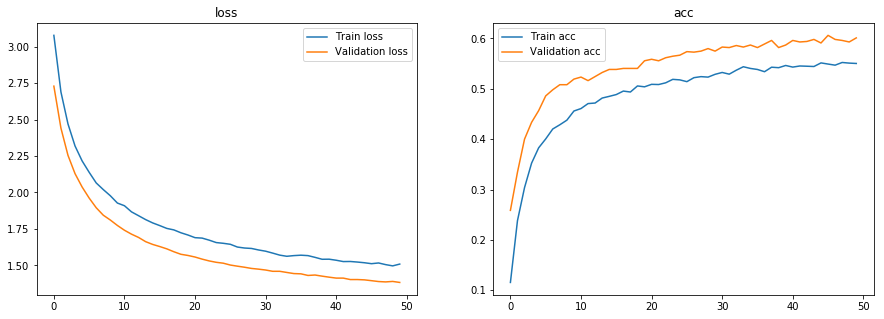

In [12]:
show_final_history(history)
model.load_weights('./base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")